<a href="https://colab.research.google.com/github/6arlos6/Quantum_machin_learning_Quantum_dots/blob/main/Pulse_noise_review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install qutip
!pip install qutip-qip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.2/16.2 MB 61.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.6/105.6 kB 3.9 MB/s eta 0:00:00


In [ ]:
!pip install folium==0.2.1
!pip install pdflatex
!sudo apt-get install texlive-latex-recommended
!sudo apt install texlive-latex-extra
!sudo apt install dvipng

In [ ]:
!sudo apt-get install texlive-full

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  aglfn asymptote asymptote-doc biber chktex cm-super cm-super-minimal context
  context-modules dvidvi emacsen-common feynmf fonts-adf-accanthis
  fonts-adf-berenis fonts-adf-gillius fonts-adf-universalis
  fonts-arphic-bkai00mp fonts-arphic-bsmi00lp fonts-arphic-gbsn00lp
  fonts-arphic-gkai00mp fonts-baekmuk fonts-cabin fonts-cantarell
  fonts-comfortaa fonts-croscore fonts-crosextra-caladea
  fonts-crosextra-carlito fonts-dejavu-core fonts-dejavu-extra
  fonts-ebgaramond fonts-ebgaramond-extra fonts-font-awesome
  fonts-freefont-otf fonts-freefont-ttf fonts-gfs-artemisia
  fonts-gfs-baskerville fonts-gfs-bodoni-classic fonts-gfs-complutum
  fonts-gfs-didot fonts-gfs-didot-classic fonts-gfs-gazis
  fonts-gfs-neohellenic fonts-gfs-olga fonts-gfs-porson fonts-gfs-solomos
  fonts-gfs-theokritos fonts-go fonts-hosny-amiri fonts-ipaexfont-got

# Gate level

In [ ]:
from qutip import *
from qutip_qip import *

In [ ]:
qc = QubitCircuit(2)
qc.add_gate('X', targets = 1)
qc.add_gate('SNOT', targets = 1)
qc.add_gate('CNOT', controls=0, targets = 1)

<ipython-input-25-2fc738546189>:1: DeprecationWarning: Importing functions/classes of the qip submodule directly from the namespace qutip is deprecated. Please import them from the submodule instead, e.g.
from qutip.qip.operations import cnot
from qutip.qip.circuit import QubitCircuit

  qc = QubitCircuit(2)


In [ ]:
initial_state= basis([2,2],[0,0])
final_state = qc.run(initial_state)
final_state

Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.70710678]
 [-0.70710678]
 [ 0.        ]
 [ 0.        ]]

In [ ]:
initial_state

Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[1.]
 [0.]
 [0.]
 [0.]]

$ \\ \left(\begin{matrix}1.0\\0.0\\0.0\\0.0\\\end{matrix}\right)$ $⟶$ $ \\ \left(\begin{matrix}0.707\\-0.707\\0.0\\0.0\\\end{matrix}\right)$

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


********** Gate 0 **********
Final fidelity error 2.220446049250313e-16
Final gradient normal 4.933410796517032e-05
Terminated due to Goal achieved
Number of iterations 3
********** Gate 1 **********
Final fidelity error 6.602642410591386e-08
Final gradient normal 0.00022383569490208173
Terminated due to function converged
Number of iterations 244
********** Gate 2 **********
Final fidelity error 6.373879535281901e-07
Final gradient normal 0.0011652528114555172
Terminated due to function converged
Number of iterations 291
********** Gate 3 **********
Final fidelity error 1.4792804630126e-06
Final gradient normal 0.0015663106933150785
Terminated due to function converged
Number of iterations 165
********** Gate 4 **********
Final fidelity error 9.154503333164143e-08
Final gradient normal 0.00044304837259022173
Terminated due to function converged
Number of iterations 176
********** Gate 5 **********
Final fidelity error 2.3685309491483508e-08
Final gradient normal 0.0004673967314508713


/usr/local/lib/python3.10/dist-packages/qutip_qip/device/processor.py:911: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  fig.tight_layout()


ValueError: ignored

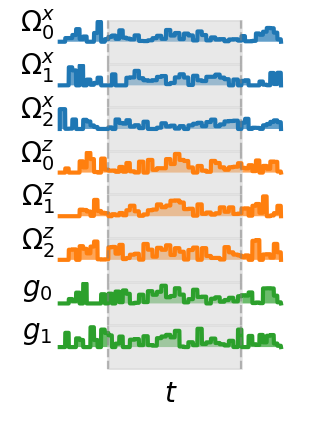

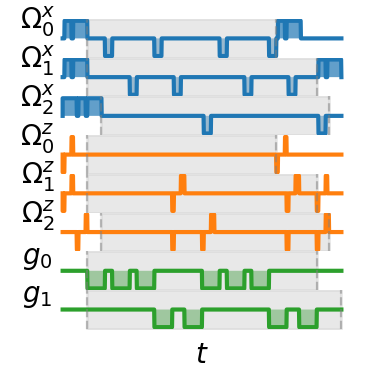

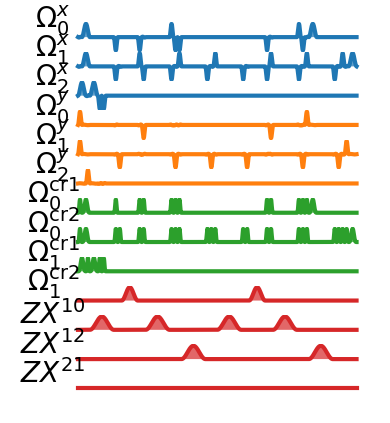

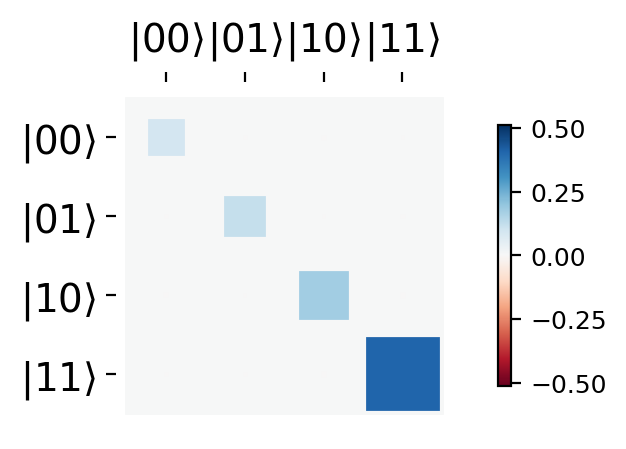

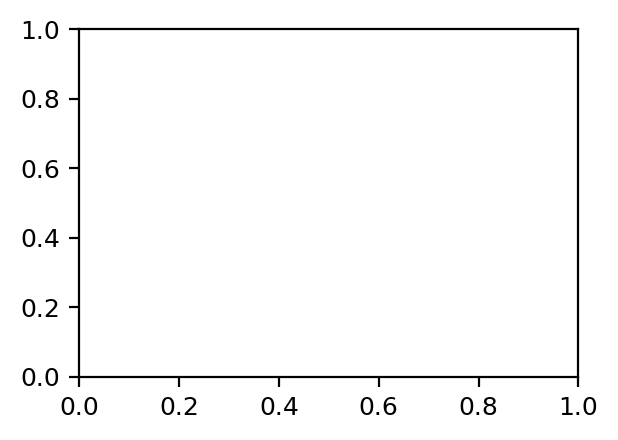

In [ ]:
TEXTWIDTH = 5.93
LINEWIDTH = 3.22
import matplotlib as mpl
import matplotlib.pyplot as plt
try:
    from quantum_plots import global_setup
    global_setup(fontsize = 10)
except:
    pass
plt.rcParams.update({"text.usetex": False, "font.size": 10})

num_qubits = 3

import numpy as np
import matplotlib.pyplot as plt
np.random.seed(2)
from qutip_qip.device import (
    OptPulseProcessor, LinearSpinChain, SCQubits, SpinChainModel)
from qutip_qip.circuit import QubitCircuit
from qutip import sigmaz, sigmax, identity, tensor, basis
#from qutip_qip.compat import to_scalar


# Deutsch-Josza algorithm
dj_circuit = QubitCircuit(num_qubits)
dj_circuit.add_gate("X", targets=2)
dj_circuit.add_gate("SNOT", targets=0)
dj_circuit.add_gate("SNOT", targets=1)
dj_circuit.add_gate("SNOT", targets=2)

# Oracle function f(x)
dj_circuit.add_gate("CNOT", controls=0, targets=2)
dj_circuit.add_gate("CNOT", controls=1, targets=2)

dj_circuit.add_gate("SNOT", targets=0)
dj_circuit.add_gate("SNOT", targets=1)

# Spin chain model
spinchain_processor = LinearSpinChain(num_qubits=num_qubits, t2=30)  # T2 = 30
spinchain_processor.load_circuit(dj_circuit)
initial_state = basis([2, 2, 2], [0, 0, 0])  # 3 qubits in the 000 state
t_record = np.linspace(0, 20, 300)
result1 = spinchain_processor.run_state(initial_state, tlist=t_record)

# Superconducting qubits
scqubits_processor = SCQubits(num_qubits=num_qubits)
scqubits_processor.load_circuit(dj_circuit)
initial_state = basis([3, 3, 3], [0, 0, 0])  #  3-level
result2 = scqubits_processor.run_state(initial_state)

# Optimal control model
setting_args = {"SNOT": {"num_tslots": 6, "evo_time": 2},
                "X": {"num_tslots": 1, "evo_time": 0.5},
                "CNOT": {"num_tslots": 12, "evo_time": 5}}
opt_processor = OptPulseProcessor(
    num_qubits=num_qubits, model=SpinChainModel(3, setup="linear"))
opt_processor.load_circuit(  # Provide parameters for the algorithm
    dj_circuit, setting_args=setting_args, merge_gates=False,
    verbose=True, amp_ubound=5, amp_lbound=0)
initial_state = basis([2, 2, 2], [0, 0, 0])
result3 = opt_processor.run_state(initial_state)

# For plotting
width = TEXTWIDTH/3
fig, ax = opt_processor.plot_pulses(figsize=(width, width*3/2.9), dpi=200);

ax[0].set_ylabel(r"$\Omega^x_{0}$")
ax[1].set_ylabel(r"$\Omega^x_{1}$")
ax[2].set_ylabel(r"$\Omega^x_{2}$")
ax[3].set_ylabel(r"$\Omega^z_{0}$")
ax[4].set_ylabel(r"$\Omega^z_{1}$")
ax[5].set_ylabel(r"$\Omega^z_{2}$")
ax[6].set_ylabel(r"$g_{0}$")
ax[7].set_ylabel(r"$g_{1}$")
ax[7].set_xlabel(r"$t$")

full_tlist = opt_processor.get_full_tlist()
two_qubit_gate_region = [[0, 13, -12]] * 8
for i, (point1, point2, point3) in enumerate(two_qubit_gate_region):
    vmin, vmax = ax[i].get_ylim()
    ax[i].fill_between([full_tlist[point2], full_tlist[point3]], [vmin ,vmin],  [vmax, vmax], color="lightgray", alpha=0.5)
    ax[i].vlines([full_tlist[point2], full_tlist[point3]], vmin, vmax, "gray", "--", linewidth=0.8, alpha=0.5)

fig.savefig("optimal_control_pulse.pdf")
fig.show()

width = TEXTWIDTH/3
fig2, ax2 = spinchain_processor.plot_pulses(figsize=(width, width*3/2.9), dpi=200);
fig2.tight_layout()
ax2[0].set_ylabel(r"$\Omega^x_{0}$")
ax2[1].set_ylabel(r"$\Omega^x_{1}$")
ax2[2].set_ylabel(r"$\Omega^x_{2}$")
ax2[3].set_ylabel(r"$\Omega^z_{0}$")
ax2[4].set_ylabel(r"$\Omega^z_{1}$")
ax2[5].set_ylabel(r"$\Omega^z_{2}$")
ax2[6].set_ylabel(r"$g_{0}$")
ax2[7].set_ylabel(r"$g_{1}$")
ax2[7].set_xlabel(r"$t$")

full_tlist = spinchain_processor.get_full_tlist()
two_qubit_gate_region = [[0, 7, -15], [0, 7, -6], [0, 8, -2], [0, 7, -15], [0, 7, -6], [0, 8, -2], [0, 7, -6], [0, 7, -1]]
for i, (point1, point2, point3) in enumerate(two_qubit_gate_region):
    vmin, vmax = ax2[i].get_ylim()
    ax2[i].fill_between([full_tlist[point2], full_tlist[point3]], [vmin ,vmin],  [vmax, vmax], color="lightgray", alpha=0.5)
    ax2[i].vlines([full_tlist[point2], full_tlist[point3]], vmin, vmax, "gray", "--", linewidth=0.8, alpha=0.5)

fig2.tight_layout()
fig2.savefig("spin_chain_pulse.pdf")
fig2.show()

width = TEXTWIDTH/3
# fig3, ax3 = scqubits_processor.plot_pulses(figsize=(width, width*3/2.43), dpi=200);
fig3, ax3 = scqubits_processor.plot_pulses(figsize=(width, width*3/2.4), dpi=200);
ax3[0].set_ylabel(r"$\Omega^x_{0}$")
ax3[1].set_ylabel(r"$\Omega^x_{1}$")
ax3[2].set_ylabel(r"$\Omega^x_{2}$")
ax3[3].set_ylabel(r"$\Omega^y_{0}$")
ax3[4].set_ylabel(r"$\Omega^y_{1}$")
ax3[5].set_ylabel(r"$\Omega^y_{2}$")
ax3[6].set_ylabel(r"$\Omega^{\rm{cr}1}_{0}$")
ax3[7].set_ylabel(r"$\Omega^{\rm{cr}2}_{0}$")
ax3[8].set_ylabel(r"$\Omega^{\rm{cr}1}_{1}$")
ax3[9].set_ylabel(r"$\Omega^{\rm{cr}2}_{1}$")
ax3[9].set_xlabel(r"$t$")

full_tlist = scqubits_processor.get_full_tlist()

fig3.savefig("transmon_pulse.pdf")
fig3.show()


plt.rcParams.update({"text.usetex": False, "font.size": 9})
# Plot hinton
from qutip import hinton
fig4, ax4 = plt.subplots(figsize=(LINEWIDTH*0.9, LINEWIDTH*0.7), dpi=200)
first_two_qubits = result1.states[-1].ptrace([0,1])
_, ax4 = hinton(
    first_two_qubits, ax=ax4,
    xlabels=['$|00\\rangle$', '$|01\\rangle$', '$|10\\rangle$', '$|11\\rangle$'],
    ylabels=['$|00\\rangle$', '$|01\\rangle$', '$|10\\rangle$', '$|11\\rangle$'])
fig4.savefig("hinton.pdf")
fig4.show()

# Plot trajectory
expect = []
for state in result1.states:
    tmp = state.ptrace([0,1])
    tmp = basis([2,2], [0,0]).dag() * tmp * basis([2,2], [0,0])
    expect.append(np.real(tmp))

fig5, ax5 = plt.subplots(figsize=(LINEWIDTH, LINEWIDTH*0.7), dpi=200)
ax5.plot(t_record, expect, color="slategrey")
ax5.set_ylabel(r"Population of $|00\rangle$")
ax5.set_xlabel(r"Time [$\mu$s]")
fig5.tight_layout()
fig5.savefig("population.pdf")
fig5.show()